打印tensorflow版本

In [140]:
# Tensorflow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.12.0


In [141]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [142]:
# i = 5
# print(train_images[i]) 

In [143]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [144]:
print(train_images.shape)     # 以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：
print(len(train_labels))

(60000, 28, 28)
60000


In [145]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [146]:
test_images.shape

(10000, 28, 28)

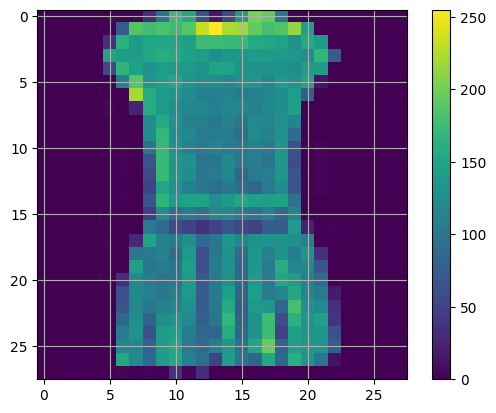

In [147]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(True)
plt.show()

In [148]:
train_images = train_images / 255.0         # 将这些值缩小至0到1之间，然后将其馈送至神经网络模型。为此，请将这些值除以255.请务必以相同的方式对训练集和测试集进行预处理：

In [149]:
test_images  = test_images / 255.0

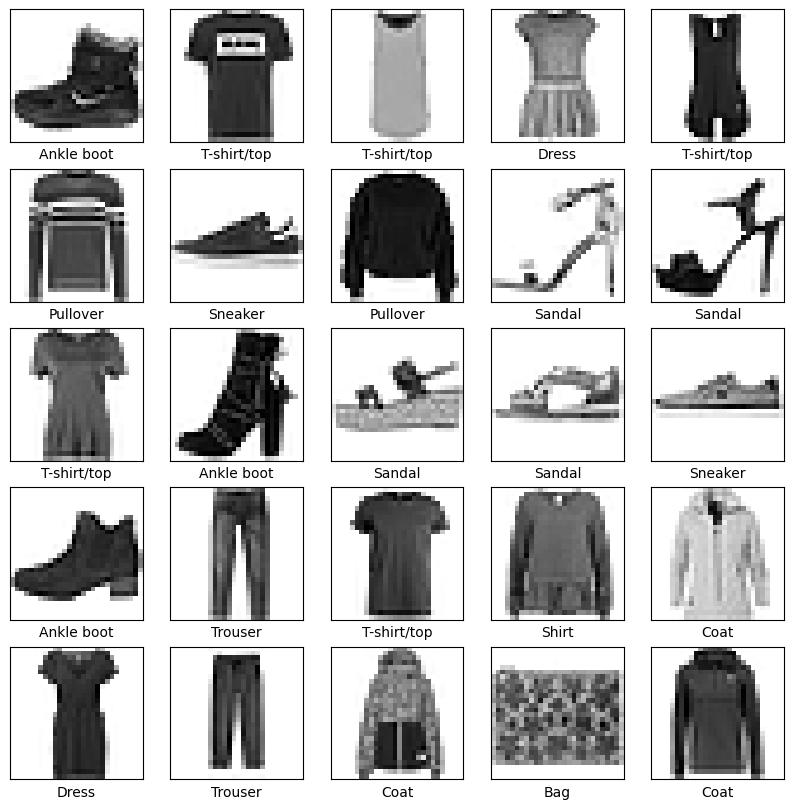

In [150]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # plt.colorbar()
    # plt.grid(True)     # 格栅
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型
构建神经网络需要先配置模型的层，然后再编译模型

## 设置层

神经网络的基本组成部分是层。层回从向其馈送的数据中提取表示形式。希望这些表示形式有助于解决手头上的问题。
大多数深度学习都包括将简单的层链接在一起。大多数层（如tf.keras.layer.Dense） 都具有在训练期间才会学习参数。

In [151]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。
    tf.keras.layers.Dense(128, activation='relu'),  # 展平像素后，网络会包括两个 tf.keras.layers.Dense 层的序列。它们是密集连接或全连接神经层。第一个 Dense 层有 128 个节点（或神经元）。
    tf.keras.layers.Dense(10)                       # 第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。
])

编译模型
在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的编译步骤中添加的：

- 损失函数 - 测量模型在训练期间的准确程度。你希望最小化此函数，以便将模型“引导”到正确的方向上。
- 优化器 - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
- 指标 - 用于监控训练和测试步骤。以下示例使用了准确率，即被正确分类的图像的比率。

In [152]:
model.compile(optimizer='adam',     # 优化器
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),         # 损失函数
              metrics=['accuracy'])             # 指标

### 训练模型
训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本例中，训练数据位于 train_images 和 train_labels 数组中。
2. 模型学习将图像和标签关联起来。
3. 要求模型对测试集（在本例中为 test_images 数组）进行预测。
4. 验证预测是否与 test_labels 数组中的标签相匹配。
### 向模型馈送数据
要开始训练，请调用 model.fit 方法，这样命名是因为该方法会将模型与训练数据进行“拟合”：

In [153]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4937 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3742 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了0.91（91%）左右。

### 评估准确率
接下来，比较模型在测试数据集上的表现：

In [154]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3238 - accuracy: 0.8882 - 517ms/epoch - 2ms/step

Test accuracy: 0.8881999850273132


结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表过拟合。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。有关更多信息，请参阅以下内容：



### 进行预测
模型经过训练后，您可以使用它对一些图像进行预测。附加一个 Softmax 层，将模型的线性输出 logits 转换成更容易理解的概率。

In [155]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [156]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [157]:
predictions[0]

array([4.5404698e-07, 1.9080100e-10, 2.9776436e-08, 1.6499088e-08,
       6.2152202e-07, 3.5580560e-03, 1.9817806e-07, 1.5479829e-02,
       2.7097082e-07, 9.8096061e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。您可以看到哪个标签的置信度值最大：

In [158]:
np.argmax(predictions[0])

9

因此，该模型非常确信这个图像是短靴，或 class_names[9]。通过检查测试标签发现这个分类是正确的：

In [159]:
test_labels[0]

9

您可以将其绘制成图表，看看模型对于全部10个类的预测。

In [160]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
               100*np.max(predictions_array),
               class_names[true_label]),
               color = color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 验证预测结果
在模型经过训练后，您可以使用它对一些图像进行预测。

我们来看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

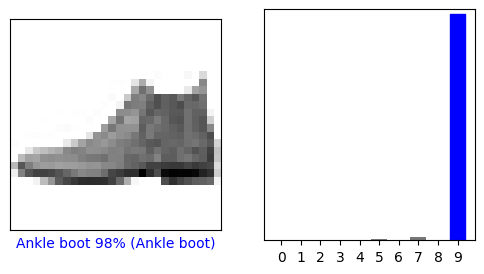

In [161]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

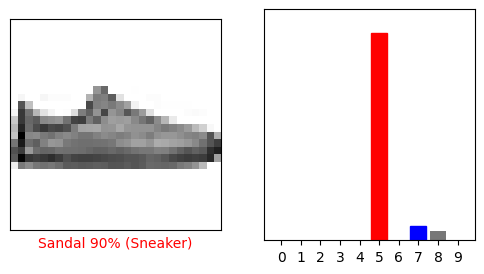

In [162]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

让我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。

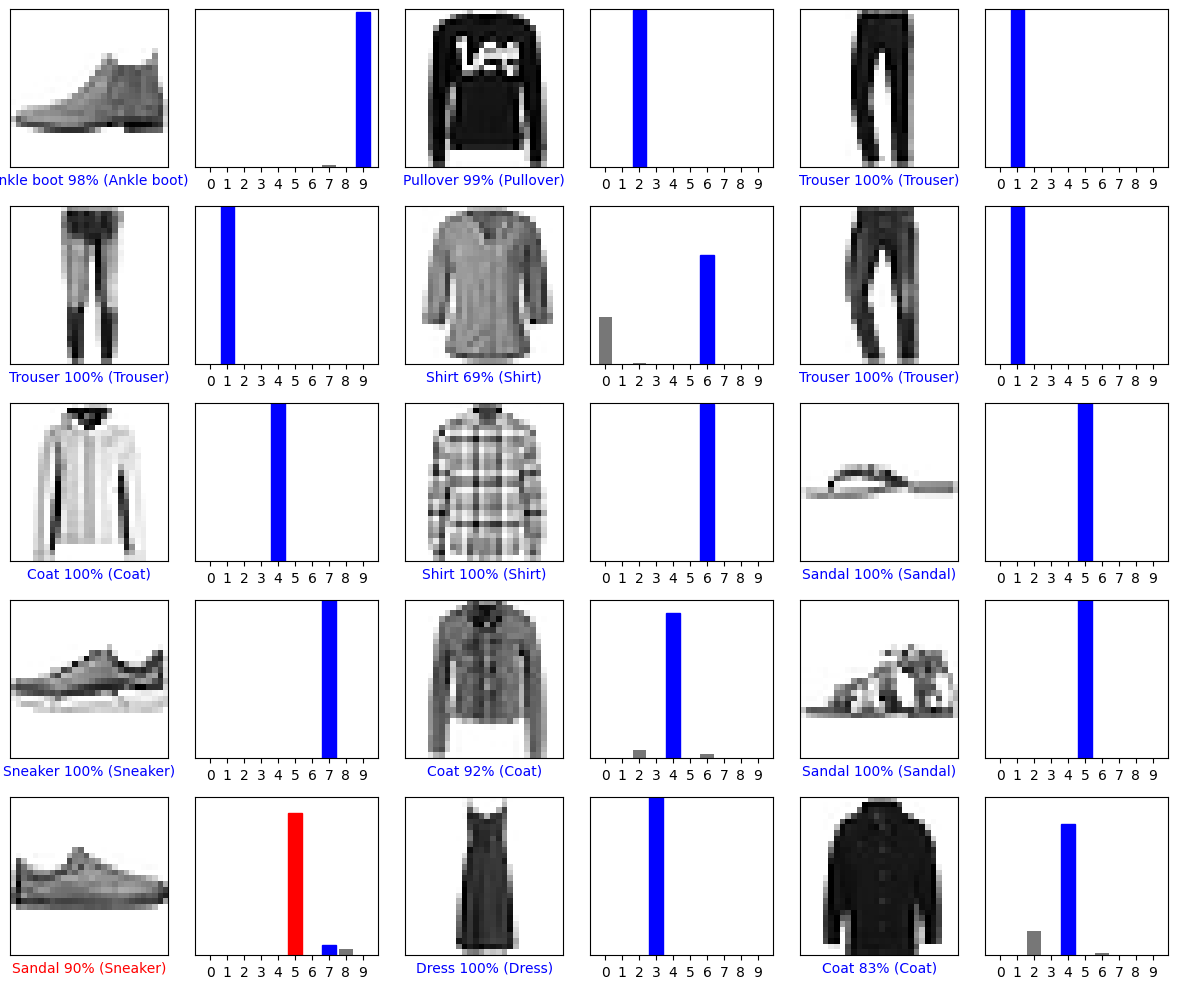

In [163]:
# plot the first  X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2* i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 使用训练好的模型
最后，使用训练好的模型对单个图像进行预测。

In [164]:
# Graph an image from the test dataset
img = test_images[i]
print(img.shape)
print(len(test_images))

(28, 28)
10000


tf.keras模型经过了优化，可同时对一个批或一组样本进行预测。因此，即使您只使用一个图像，您也需要将其添加到列表中：

In [165]:
# Add the image to a batch where it is the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [166]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 15ms/step
[[1.2014941e-04 1.1154936e-05 1.5445724e-01 1.6518325e-03 8.2946479e-01
  1.9663340e-12 1.4056746e-02 8.9624327e-15 2.3808537e-04 7.7902476e-11]]


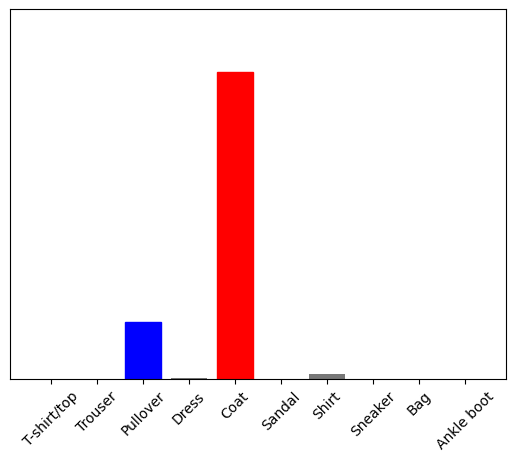

In [167]:
plot_value_array(1, predictions_single[0], test_labels)
_= plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [168]:
np.argmax(predictions_single[0])

4